### Transportation Problem

**Author:** Guilherme Cadori

**Date:** 09/04/2024



#### Transportation Problem: Facilities as a Parameter

- We will model a variation of the original transportation problem, considering the amount of possible supplying facilities as a parameter in this version of the model


- Possible supplying facilities in this case can be interpreted as facilities readly available to be used


- Our main goal is to minimize total cost, which is composed by transportation costs and fixed operating costs for each facility


#### Mathematical Model

##### Sets
* $I$: Set of supplying facilities, indexed by *i*.
* $J$: Set of demand points, indexed by *j*

##### Parameters
* $COST_{ij}$ : Cost of transporting a unit of goods from supply source *i* to demand point *j*.
* $OPERATING \,\, COST_{i}$ : Fixed cost of operating facility *i*.
* $SUPPLY \,\, CAPACITY_{i}$ : Supply capacity of source *i*. This is the maximum amount of goods that facility *i* can supply.
* $DEMAND_{j}$ : Demand requirement at point *j*. This is the amount of goods required by consumer *j*.
* $FACILITIES$ : Maximum number of facilities allowed to be active.


##### Decision Variables
* $x_{ij}$ : Number of units transported from supply source *i* to demand point *j*. This is the primary decision variable.
* $y_{i}$ : A binary decision variable which is equal to 1 if supply source *i* is active and equal to 0 otherwise.


##### Model
$\displaystyle 
min \sum_{i \in I} \sum_{j \in J} \textit{COST}_{ij} \cdot x_{ij} + \sum_{i \in I} \textit{OPERATING COST}_{i} \cdot y_{i}
$

$\displaystyle 
s.t. 
$

$\displaystyle
\sum_{j \in J} x_{ij} \leq \textit{SUPPLY CAPACITY}_{i} \quad \forall i \in I
$

$\displaystyle
\sum_{i \in I} x_{ij} \geq \textit{DEMAND}_{j} \quad \forall j \in J
$

$\displaystyle
\sum_{i \in I} x_{ij} \leq \textit{M} \cdot y_{i} \quad \forall i \in I, j \in J
$

$\displaystyle
\sum_{i \in I} y_{i} \leq \textit{FACILITIES}
$

$x_{ij}, y_{i} \geq 0$

$x_{ij} \in \mathbb{Z}$

$y_{i} \in \{0, 1\}$



#### Implementation

In [1]:
# Importing libraries
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Setting seed for reproducibility
np.random.seed(123)

# Creating model
model = gp.Model('Transport')

# Sets
# Creating sets
facilities = 5
demand_points = 4

I = range(facilities)
J = range(demand_points)

# Parameters
# Creating transportation cost parameters
lower = 25
upper = 150
cost_transport = np.random.uniform(lower, upper, (facilities, demand_points))

# Facility fixed operating cost
operating_cost = np.array([300, 120, 200, 150, 180])

# Creating demand parameters
demand = np.array([75, 87, 45, 50])

# Creating supply parameters
supply_capacity = np.array([80, 100, 60, 120, 68])
M = sum(supply_capacity)



Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-27


In [3]:
# Creating model
model = gp.Model('Transport')

# Variables
# Creating variables
x = model.addVars(I, J, vtype=GRB.INTEGER, name='x')
y = model.addVars(I, vtype=GRB.BINARY, name='y')

# Objective Function
Objective = ((gp.quicksum(cost_transport[i, j] * x[i, j] for i in I for j in J))
              + (gp.quicksum(operating_cost[i] * y[i] for i in I)))

model.setObjective(Objective, sense=GRB.MINIMIZE)

# Constraints
# Supply capacity constraint
c1 = model.addConstrs((gp.quicksum(x[i, j] for j in J) <= supply_capacity[i] for i in I), 
                       name='supply_capacity')

# Demand capacity constraint - Surplus capacity assumption
c2 = model.addConstrs((gp.quicksum(x[i, j] for i in I) >= demand[j] for j in J), 
                       name='demand')

# Logical constraint - Supply from j only if j is active
c3 = model.addConstrs((x[i, j] <= M * y[i] for i in I for j in J), 
                       name='supply')

# Facility availability constraint
c4 = model.addConstr(gp.quicksum(y[i] for i in I) <= facilities, 
                     name='facility_limit')



In [4]:
# Updating model - will be necessary in case we update constraints or parameters
model.update()


In [5]:
# Solving the model
model.optimize()


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 30 rows, 25 columns and 85 nonzeros
Model fingerprint: 0x15dfba07
Variable types: 0 continuous, 25 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+02]
  Objective range  [3e+01, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 1e+02]
Found heuristic solution: objective 25121.240976
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 24 rows, 25 columns, 73 nonzeros
Variable types: 0 continuous, 25 integer (5 binary)
Found heuristic solution: objective 24999.959321

Root relaxation: objective 1.464546e+04, 12 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Bes

#### Solution

In [6]:
# Checking solution
# Objective Function
print(f'Objective Funtion: {round(model.ObjVal, 2)}\n')

# Decision variables
print('Decision Variables:')
for var in model.getVars():
    if var.X > 0.5:
        print(f'Variable {var.VarName}: {var.X}')

# Slack
print('\nSlack Values:')
for constr in model.getConstrs():
    slack = constr.getAttr('Slack')
    if slack > 0.5:
        print(f'Constraint {constr.ConstrName} Slack: {slack}')


Objective Funtion: 14681.67

Decision Variables:
Variable x[0,2]: 30.0
Variable x[0,3]: 50.0
Variable x[3,0]: 7.0
Variable x[3,1]: 87.0
Variable x[3,2]: 15.0
Variable x[4,0]: 68.0
Variable y[0]: 1.0
Variable y[3]: 1.0
Variable y[4]: 1.0

Slack Values:
Constraint supply_capacity[1] Slack: 100.0
Constraint supply_capacity[2] Slack: 60.0
Constraint supply_capacity[3] Slack: 11.0
Constraint supply[0,0] Slack: 428.0
Constraint supply[0,1] Slack: 428.0
Constraint supply[0,2] Slack: 398.0
Constraint supply[0,3] Slack: 378.0
Constraint supply[3,0] Slack: 421.0
Constraint supply[3,1] Slack: 341.0
Constraint supply[3,2] Slack: 413.0
Constraint supply[3,3] Slack: 428.0
Constraint supply[4,0] Slack: 360.0
Constraint supply[4,1] Slack: 428.0
Constraint supply[4,2] Slack: 428.0
Constraint supply[4,3] Slack: 428.0
Constraint facility_limit Slack: 2.0


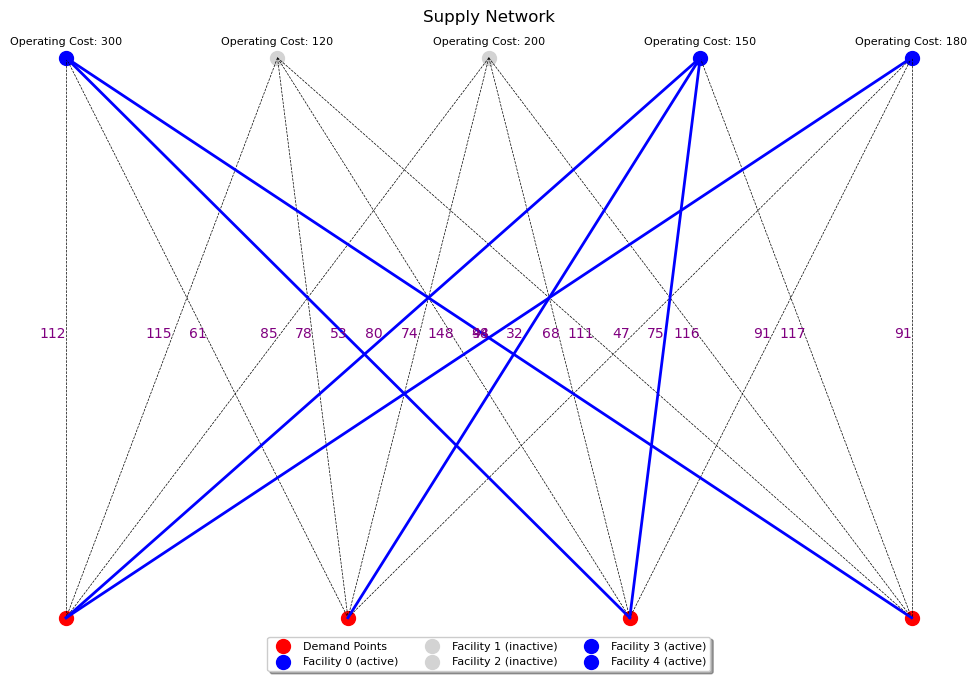

In [7]:
# Plotting the solution
# Solution data
solution_x = {
    (0, 2): 30.0,
    (0, 3): 50.0,
    (3, 0): 7.0,
    (3, 1): 87.0,
    (3, 2): 15.0,
    (4, 0): 68.0,
}

solution_y = {
    0: 1.0,
    3: 1.0,
    4: 1.0,
}

# Plotting facilities, demand points, transportation costs, demand, and supply capacities as a graph
fig, ax = plt.subplots(figsize=(12, 8))

# Facility nodes
facility_x = np.linspace(0.1, 0.9, facilities)
facility_y = np.full(facilities, 0.8)
ax.scatter(facility_x, facility_y, color='gray')

# Demand point nodes
demand_x = np.linspace(0.1, 0.9, demand_points)
demand_y = np.full(demand_points, 0.2)
ax.scatter(demand_x, demand_y, color='red', s=100, label='Demand Points')

# Drawing edges for transportation costs
for i in I:
    for j in J:
        ax.plot([facility_x[i], demand_x[j]], [facility_y[i], demand_y[j]], 'k--', lw=0.5)
        mid_x = (facility_x[i] + demand_x[j]) / 2
        mid_y = (facility_y[i] + demand_y[j]) / 2
        ax.text(mid_x, mid_y, f'{cost_transport[i, j]:.0f}', color='purple', fontsize=10, ha='right')
        
# Drawing edges for activated transportation routes
for (i, j), val in solution_x.items():
    if val > 0:
        ax.plot([facility_x[i], demand_x[j]], [facility_y[i], demand_y[j]], 'b-', lw=2)
        mid_x = (facility_x[i] + demand_x[j]) / 2
        mid_y = (facility_y[i] + demand_y[j]) / 2

# Facility nodes (highlighting active facilities)
for i in I:
    if solution_y.get(i, 0) > 0:
        ax.scatter(facility_x[i], facility_y[i], color='blue', s=100, label=f'Facility {i} (active)')
    else:
        ax.scatter(facility_x[i], facility_y[i], color='lightgrey', s=100, label=f'Facility {i} (inactive)')
    ax.text(facility_x[i], facility_y[i] + 0.014, f'Operating Cost: {operating_cost[i]}', fontsize=8, ha='center')

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=3, fontsize=8)
ax.axis('off')
ax.set_title('Supply Network')

plt.show()


***
**End**
***